In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
sns.set()

df1 = pd.read_excel(r'../data/DATA_XUNLIAN_1.xlsx')
df2 = pd.read_excel(r'../data/DATA_XUNLIAN_2.xlsx')
df3 = pd.read_excel(r'../data/DATA_XUNLIAN_3.xlsx')

#df = pd.concat([df1,df2,df3], ignore_index=True)
df = df1
df.head()

,温度,湿度,电压
0,21.6,35.4,0.80
1,21.6,36.2,1.04
2,21.6,37.6,1.00
3,21.6,38.5,1.18
4,21.8,39.4,1.17


In [7]:
df.shape

(3313, 3)

In [8]:
pd.date_range(start = '2019-1-1',periods = len(df),freq ="D").values #这里写开始日期

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', ...,
       '2028-01-24T00:00:00.000000000', '2028-01-25T00:00:00.000000000',
       '2028-01-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
df["Time"] = pd.date_range(start = '2019-1-1',periods = len(df),freq ="D").values

In [10]:
DATA_SET=df.T

In [11]:
DATA_SET

,0,1,2,3,4,5,6,7,8,9,...,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312
温度,21.6,21.6,21.6,21.6,21.8,21.8,21.8,21.9,22,22,...,20.4,20.4,20.4,20.5,20.6,20.7,20.7,20.8,20.9,21
湿度,35.4,36.2,37.6,38.5,39.4,40.3,41.1,41.3,41.2,40.7,...,39.7,41.2,42.3,43.3,43.6,43.6,43.3,44,44.7,44.4
电压,0.8,1.04,1,1.18,1.17,1.21,1.29,1.35,1.39,1.43,...,1.59,1.61,1.55,1.52,1.55,1.55,1.55,1.55,1.57,1.46
Time,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,...,2028-01-17 00:00:00,2028-01-18 00:00:00,2028-01-19 00:00:00,2028-01-20 00:00:00,2028-01-21 00:00:00,2028-01-22 00:00:00,2028-01-23 00:00:00,2028-01-24 00:00:00,2028-01-25 00:00:00,2028-01-26 00:00:00


In [12]:
DATA_SET.columns = df["Time"].values
DATA_SET = DATA_SET.drop(["Time"])
DATA_SET

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2028-01-17,2028-01-18,2028-01-19,2028-01-20,2028-01-21,2028-01-22,2028-01-23,2028-01-24,2028-01-25,2028-01-26
温度,21.6,21.6,21.6,21.6,21.8,21.8,21.8,21.9,22,22,...,20.4,20.4,20.4,20.5,20.6,20.7,20.7,20.8,20.9,21
湿度,35.4,36.2,37.6,38.5,39.4,40.3,41.1,41.3,41.2,40.7,...,39.7,41.2,42.3,43.3,43.6,43.6,43.3,44,44.7,44.4
电压,0.8,1.04,1,1.18,1.17,1.21,1.29,1.35,1.39,1.43,...,1.59,1.61,1.55,1.52,1.55,1.55,1.55,1.55,1.57,1.46


In [13]:
data_start_date = DATA_SET.columns[0]
data_end_date = DATA_SET.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2019-01-01 00:00:00 to 2028-01-26 00:00:00


In [14]:
from datetime import timedelta

pred_steps = 50
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1) 

In [15]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1) 

In [16]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2019-01-01 00:00:00 - 2027-10-18 00:00:00
Train prediction: 2027-10-19 00:00:00 - 2027-12-07 00:00:00 

Val encoding: 2019-02-20 00:00:00 - 2027-12-07 00:00:00
Val prediction: 2027-12-08 00:00:00 - 2028-01-26 00:00:00

Encoding interval: 3213
Prediction interval: 50


In [17]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in DATA_SET.columns.values[1:]]),
                          data=[i for i in range(len(DATA_SET.columns.values[1:]))])

series_array = DATA_SET[DATA_SET.columns[1:]].values
series_array[[1,2], :] = series_array[[2,1], :]


def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    #series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    #series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    #series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    #series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [18]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam

# convolutional operation parameters
n_filters = 32 # 32 
filter_width = 4
dilation_rates = [2**i for i in range(12)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(16, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(16, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))


# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]


pred_seq_train = Lambda(slice, arguments={'seq_length':50})(out)

model = Model(history_seq, pred_seq_train)
model.compile(Adam(), loss='mse')

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
first_n_samples = 3
batch_size = 1024
epochs = 50

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

model.compile(Adam(), loss='mse')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)  


Train on 2 samples, validate on 1 samples
Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 185.6934 - val_loss: 1117.4733
Epoch 2/50
2/2 [==============================] - 1s 301ms/step - loss: 169.0073 - val_loss: 1031.6023
Epoch 3/50
2/2 [==============================] - 1s 291ms/step - loss: 148.7565 - val_loss: 927.6614
Epoch 4/50
2/2 [==============================] - 1s 296ms/step - loss: 124.1322 - val_loss: 806.6914
Epoch 5/50
2/2 [==============================] - 1s 280ms/step - loss: 95.9403 - val_loss: 671.1637
Epoch 6/50
2/2 [==============================] - 1s 292ms/step - loss: 63.3295 - val_loss: 528.9113
Epoch 7/50
2/2 [==============================] - 1s 262ms/step - loss: 46.4961 - val_loss: 393.1714
Epoch 8/50
2/2 [==============================] - 1s 278ms/step - loss: 33.8696 - val_loss: 283.9599
Epoch 9/50
2/2 [==============================] - 1s 324ms/step - loss: 41.7311 - val_loss: 218.8113
Epoch 10/50
2/2 [===========================

In [20]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei'] #此为作图中文字体，不加载可能会乱码

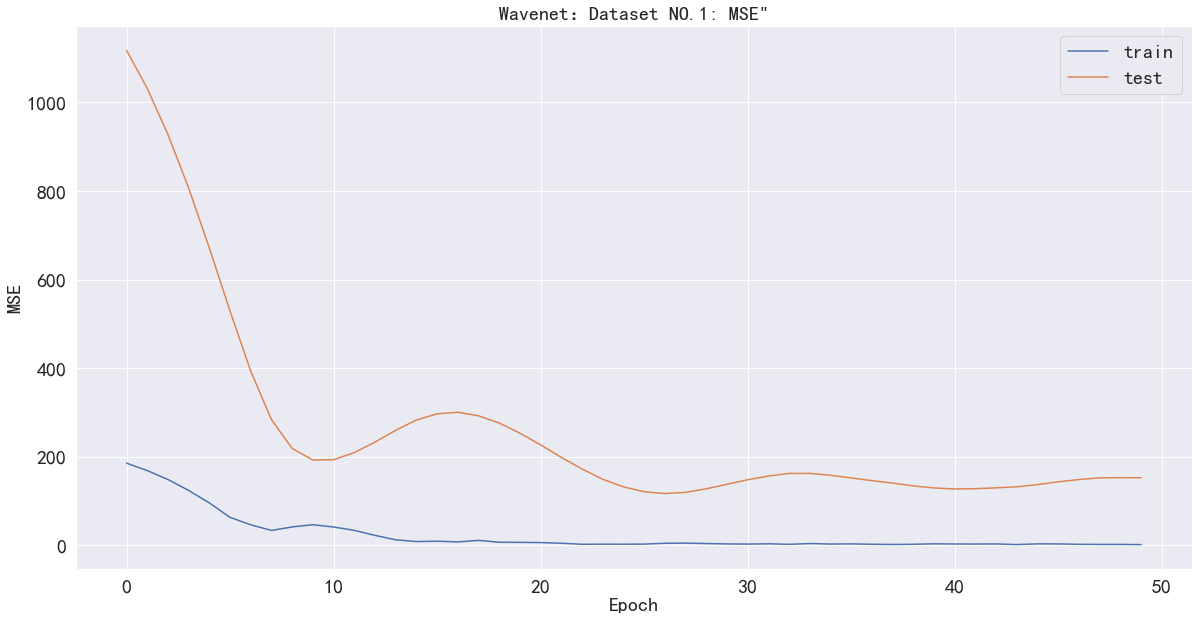

In [21]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Wavenet：Dataset NO.1: MSE"', fontsize=20)
plt.legend(['train','test'], fontsize=20)

In [22]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [23]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [25]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=10):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(20,10))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Wavenet：Dataset NO.1 Prediction comparison',fontsize=20)
    plt.legend(['Encoding Series','Target Series','Predictions'],fontsize=20)

In [26]:
decoder_target_data.shape

(3, 50, 1)

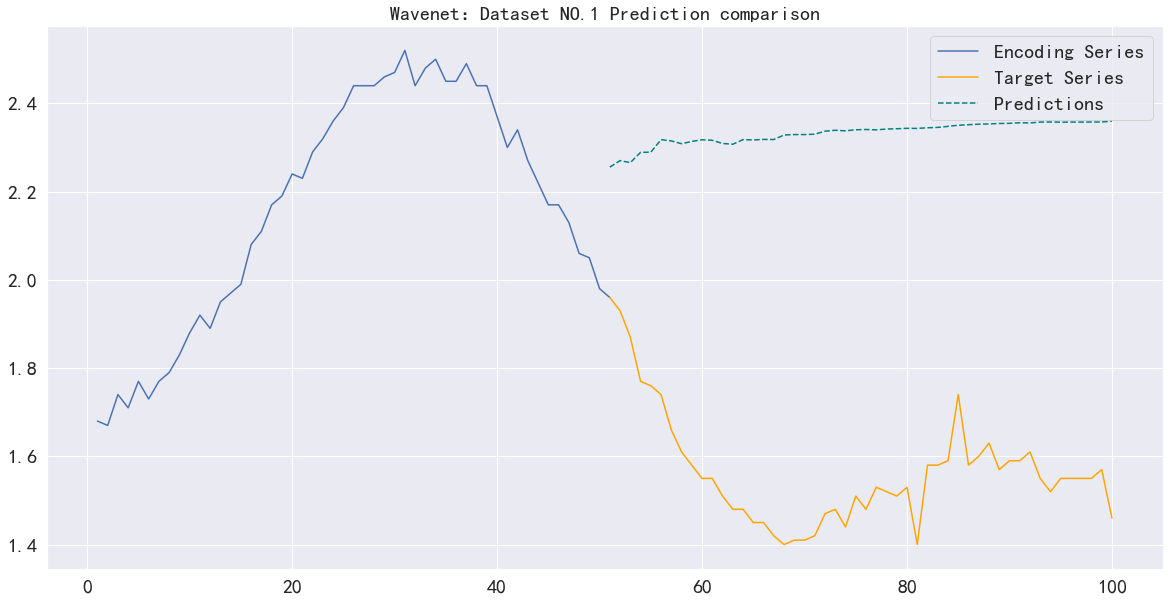

In [27]:
matplotlib.rcParams['axes.unicode_minus'] = False
predict_and_plot(encoder_input_data, decoder_target_data, sample_ind=1, enc_tail_len=50)